<a href="https://colab.research.google.com/github/Boaz-csejam/Boaz-csejam.github.in/blob/master/covidanalysis_major.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from statsmodels.tsa.api import Holt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
covid = pd.read_csv("covid_19_data.csv")
covid.head(15)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


In [ ]:
print("Size and shape of the dataset",covid.shape)
print("Checking for the null values",covid.isnull().sum())
print("Checking Data types",covid.dtypes)

Size and shape of the dataset (18327, 8)
Checking for the null values SNo                   0
ObservationDate       0
Province/State     9277
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64
Checking Data types SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object


In [ ]:
covid.drop(["SNo"],1,inplace=True)

In [ ]:
covid.isnull().sum()

ObservationDate       0
Province/State     9277
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [ ]:
covid["ObservationData"] = pd.to_datetime(covid["ObservationDate"])


In [ ]:
datewise = covid.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})

In [ ]:
print("Basic Information")
print("total number of the confirmed cases",datewise["Confirmed"].iloc[-1])
print("total number of the recovered cases",datewise["Recovered"].iloc[-1])
print("total number of the death cases",datewise["Deaths"].iloc[-1])
print("total number of the active cases",(datewise["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1]))
print("total number of the closed cases",(datewise["Recovered"].iloc[-1]+datewise["Deaths"].iloc[-1]))

Basic Information
total number of the confirmed cases 2811193.0
total number of the recovered cases 793601.0
total number of the death cases 197159.0
total number of the active cases 1820433.0
total number of the closed cases 990760.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93]),
 <a list of 94 Text major ticklabel objects>)

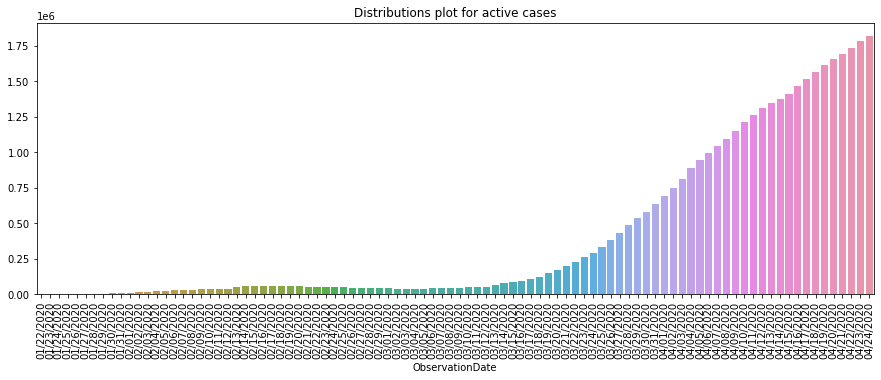

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index, y=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"])
plt.title("Distributions plot for active cases")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93]),
 <a list of 94 Text major ticklabel objects>)

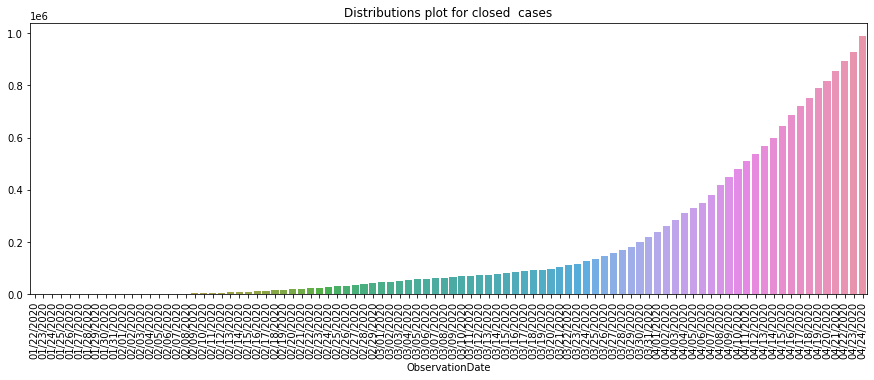

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index, y=datewise["Recovered"]+datewise["Deaths"])
plt.title("Distributions plot for closed  cases")
plt.xticks(rotation=90)

Text(0.5, 1.0, 'weekly progress of the cases')

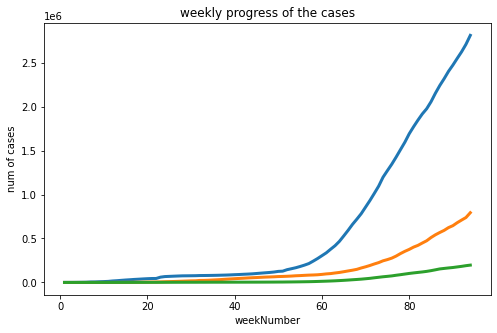

In [ ]:
datewise["WeekofYear"] =datewise.index
week_num= []
weekwise_confirmed= []
weekwise_recovered= []
weekwise_deaths= []
w = 1
for i in list(datewise["WeekofYear"].unique()):
  weekwise_confirmed.append(datewise[datewise["WeekofYear"]==i]["Confirmed"].iloc[-1])
  weekwise_recovered.append(datewise[datewise["WeekofYear"]==i]["Recovered"].iloc[-1])
  weekwise_deaths.append(datewise[datewise["WeekofYear"]==i]["Deaths"].iloc[-1])
  week_num.append(w)
  w=w+1
plt.figure(figsize=(8,5))
plt.plot(week_num,weekwise_confirmed,linewidth=3)
plt.plot(week_num,weekwise_recovered,linewidth=3)
plt.plot(week_num,weekwise_deaths,linewidth=3)
plt.xlabel("weekNumber")
plt.ylabel("num of cases")
plt.title("weekly progress of the cases")

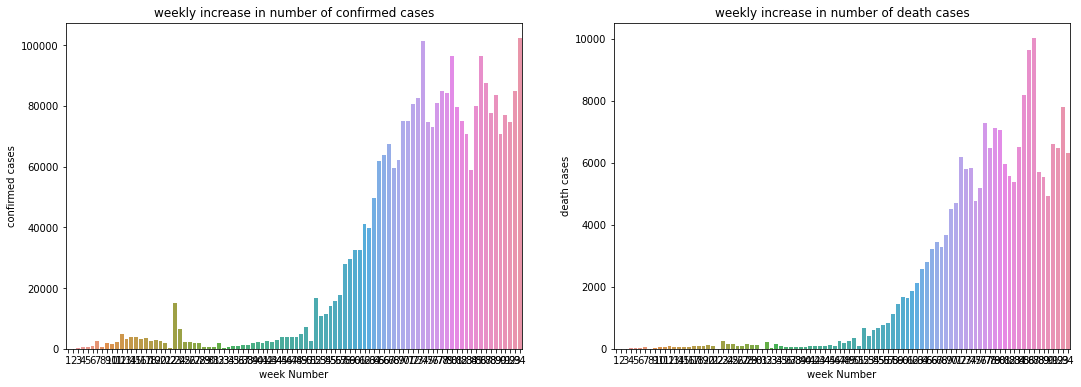

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(18,6))
sns.barplot(x= week_num,y=pd.Series(weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x= week_num,y=pd.Series(weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("week Number")
ax2.set_xlabel("week Number")
ax1.set_ylabel("confirmed cases")
ax2.set_ylabel("death cases")
ax1.set_title("weekly increase in number of confirmed cases")
ax2.set_title("weekly increase in number of death cases")
plt.show()

average of the number of the confirmed cases 29900.0
average of the number of the recovered cases 8442.0
average of the number of the deaths cases 2097.0


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93],
 <a list of 94 Text major ticklabel objects>)

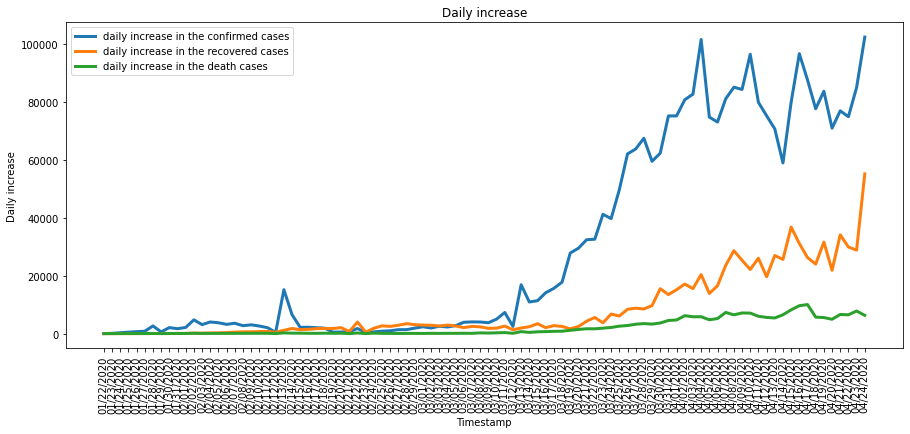

In [ ]:
print("average of the number of the confirmed cases",np.round(datewise["Confirmed"].diff().fillna(0).mean()))
print("average of the number of the recovered cases",np.round(datewise["Recovered"].diff().fillna(0).mean()))
print("average of the number of the deaths cases",np.round(datewise["Deaths"].diff().fillna(0).mean()))
plt.figure(figsize=(15,6))

plt.plot(datewise["Confirmed"].diff().fillna(0),label="daily increase in the confirmed cases",linewidth=3)
plt.plot(datewise["Recovered"].diff().fillna(0),label="daily increase in the recovered cases",linewidth=3)
plt.plot(datewise["Deaths"].diff().fillna(0),label="daily increase in the death cases",linewidth=3)
plt.xlabel("Timestamp")
plt.ylabel("Daily increase")
plt.title("Daily increase")
plt.legend()
plt.xticks(rotation=90)

In [ ]:
countrywise=covid[covid["ObservationDate"]==covid["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"}).sort_values(["Confirmed"],ascending=False)
countrywise["Mortality"]=(countrywise["Deaths"]/countrywise["Recovered"])*100
countrywise["Recovered"]=(countrywise["Recovered"]/countrywise["Confirmed"])*100


Text(0.5, 1.0, 'Top 15 countries as per number of death cases')

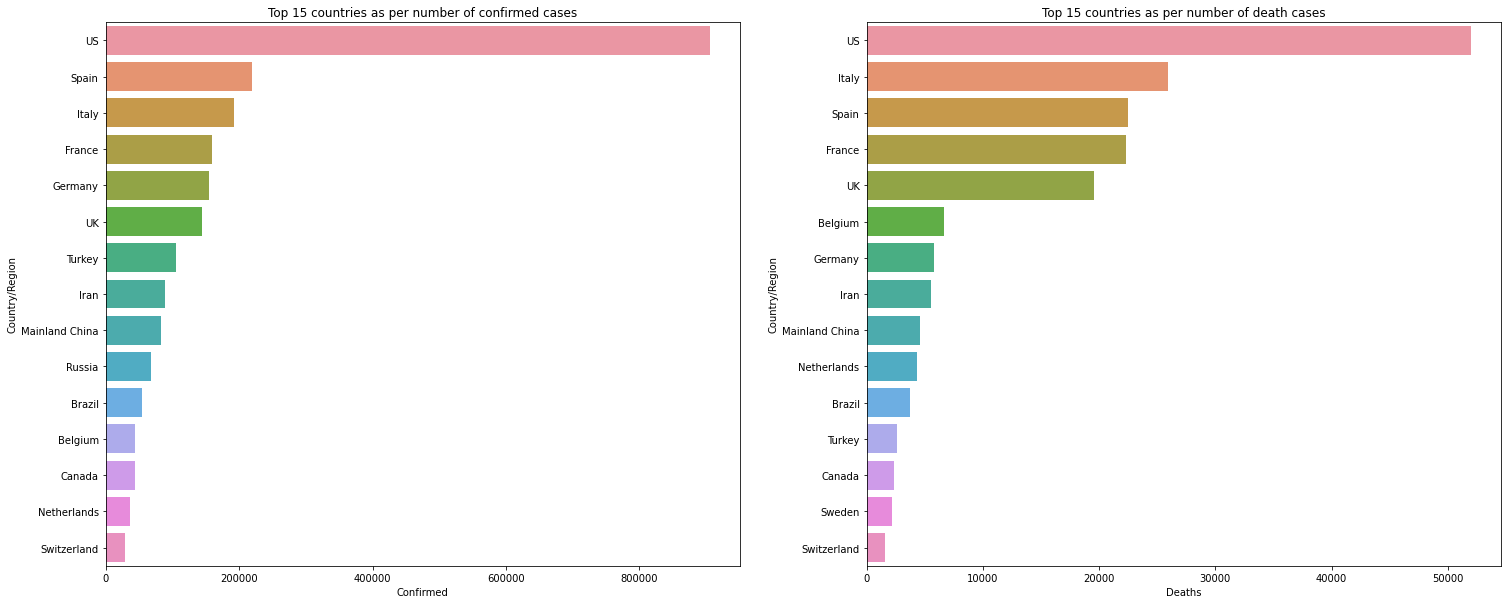

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(25,10))
top_15confirmed=countrywise.sort_values(["Confirmed"],ascending=False).head(15)
top_15deaths=countrywise.sort_values(["Deaths"],ascending=False).head(15)
sns.barplot(x=top_15confirmed["Confirmed"],y=top_15confirmed.index,ax=ax1)
ax1.set_title("Top 15 countries as per number of confirmed cases")
sns.barplot(x=top_15deaths["Deaths"],y=top_15deaths.index,ax=ax2)
ax2.set_title("Top 15 countries as per number of death cases")



In [ ]:
#data analysis
india_data=covid[covid["Country/Region"]=="India"]
datewise_india=india_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print(datewise_india.iloc[-1])
print("Total active cases",datewise_india["Confirmed"].iloc[-1]-datewise_india["Recovered"].iloc[-1]-datewise_india["Deaths"].iloc[-1])
print("Total closed cases",datewise_india["Recovered"].iloc[-1]+datewise_india["Deaths"].iloc[-1])


Confirmed    24530.0
Recovered     5498.0
Deaths         780.0
Name: 04/24/2020, dtype: float64
Total active cases 18252.0
Total closed cases 6278.0


In [ ]:
us_data=covid[covid["Country/Region"]=="US"]
datewise_us=us_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print(datewise_us.iloc[-1])
print("Total active cases",datewise_us["Confirmed"].iloc[-1]-datewise_us["Recovered"].iloc[-1]-datewise_us["Deaths"].iloc[-1])
print("Total closed cases",datewise_us["Recovered"].iloc[-1]+datewise_us["Deaths"].iloc[-1])


Confirmed    905333.0
Recovered     99079.0
Deaths        51949.0
Name: 04/24/2020, dtype: float64
Total active cases 754305.0
Total closed cases 151028.0


In [ ]:
spain_data=covid[covid["Country/Region"]=="Spain"]
datewise_spain=spain_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print(datewise_spain.iloc[-1])
print("Total active cases",datewise_spain["Confirmed"].iloc[-1]-datewise_spain["Recovered"].iloc[-1]-datewise_spain["Deaths"].iloc[-1])
print("Total closed cases",datewise_spain["Recovered"].iloc[-1]+datewise_spain["Deaths"].iloc[-1])


Confirmed    219764.0
Recovered     92355.0
Deaths        22524.0
Name: 04/24/2020, dtype: float64
Total active cases 104885.0
Total closed cases 114879.0


Text(0.5, 1.0, 'weekly progress of the cases in India')

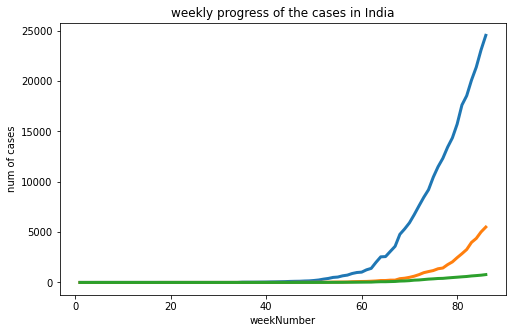

In [ ]:
datewise_india["WeekofYear"] =datewise_india.index
week_num_india= []
india_weekwise_confirmed= []
india_weekwise_recovered= []
india_weekwise_deaths= []
w = 1
for i in list(datewise_india["WeekofYear"].unique()):
  india_weekwise_confirmed.append(datewise_india[datewise_india["WeekofYear"]==i]["Confirmed"].iloc[-1])
  india_weekwise_recovered.append(datewise_india[datewise_india["WeekofYear"]==i]["Recovered"].iloc[-1])
  india_weekwise_deaths.append(datewise_india[datewise_india["WeekofYear"]==i]["Deaths"].iloc[-1])
  week_num_india.append(w)
  w=w+1
plt.figure(figsize=(8,5))
plt.plot(week_num_india,india_weekwise_confirmed,linewidth=3)
plt.plot(week_num_india,india_weekwise_recovered,linewidth=3)
plt.plot(week_num_india,india_weekwise_deaths,linewidth=3)
plt.xlabel("weekNumber")
plt.ylabel("num of cases")
plt.title("weekly progress of the cases in India")

In [ ]:
max_ind=datewise_india["Confirmed"].max()
china_data=covid[covid["Country/Region"]=="Mainland China"]
Italy_data=covid[covid["Country/Region"]=="Italy"]
US_data=covid[covid["Country/Region"]=="US"]
spain_data=covid[covid["Country/Region"]=="Spain"]
datewise_china=china_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_Italy=Italy_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_US=US_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_Spain=spain_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print("It took",datewise_india[datewise_india["Confirmed"]>0].shape[0],"days in India to reach",max_ind,"Confirmed Cases")
print("It took",datewise_Italy[(datewise_Italy["Confirmed"])>0&(datewise_Italy["Confirmed"]<=max_ind)].shape[0],"days in Italy to reach Confirmed Cases")
print("It took",datewise_US[(datewise_US["Confirmed"])>0&(datewise_US["Confirmed"]<=max_ind)].shape[0],"days in US to reach Confirmed Cases")
print("It took",datewise_Spain[(datewise_Spain["Confirmed"])>0&(datewise_Spain["Confirmed"]<=max_ind)].shape[0],"days in Spain to reach Confirmed Cases")
print("It took",datewise_china[(datewise_china["Confirmed"])>0&(datewise_china["Confirmed"]<=max_ind)].shape[0],"days in China to reach Confirmed Cases")



It took 86 days in India to reach 24530.0 Confirmed Cases
It took 85 days in Italy to reach Confirmed Cases
It took 94 days in US to reach Confirmed Cases
It took 84 days in Spain to reach Confirmed Cases
It took 94 days in China to reach Confirmed Cases


In [ ]:
#datewise["Days Since"]=datewise.index - datewise.index[0]
#datewise["Days Since"] = datewise["Days Since"].dt
train_ml=datewise.iloc[:int (datewise.shape[0]*0.95)]
valid_ml = datewise.iloc[:int (datewise.shape[0]*0.95):]
model_scores=[]

In [ ]:
lin_reg=LinearRegression(normalize=True)
svm=SVR(C=1,degree=5,kernel='poly',epsilon=0.001)
lin_reg.fit(np.array(train_ml ["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))
svm.fit(np.array(train_ml (["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1)))
prediction_valid_lin_reg=lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
prediction_valid_svm = svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
new_data=[]
new_prediction_lr=[]
for i in range(1,18):
  new_data.append(datewise.index[-1]+timedelta(days=i))
  new_prediction_lr.append(lin_reg.predict(np.array(datewise["Days Since"].max())))
  new_prediction_svm.append(svm.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1)))
pd.set_option("display.float_format",lambda x:'%f'%x)
model_predictions=pd.DataFrame(zip(new_date,new_prediction_lr,new_prediction_svm),columns=["Dates,LR,SVR"])
model_predictions.head(10)
model_train=datewise.iloc[:int(datewise.shape[0]*0.85)]
valid=datewise.iloc[int(datewise.shape[0]*0.85)]
holt =Holt(np.esarray(model_train["Confirmed"])).fits(smoothing_level=1.4,smoothing_slope=0.2)
y_pred=valid.copy()
y_pred["Holt"]=holt.forecast(len(valid))
holt_new_date=[]
holt_new_prediction=[]
for i in range(1,18):
  holt_new_date.append(datewise.index[-1]+timedelta(days=i))
  holt_new_prediction.append(holt.forecast(len(valid)+i))[-1]
model_predictions["holts linear model opredictions"]=holt_new_prediction
model_predictions.head()